In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Data preperation

# Generate data
X, y = make_blobs(n_samples=300, n_features=4, centers=3, random_state=231)

# Convert to DataFrame for convenience
df_blobs = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(4)])
df_blobs['True_Label'] = y  

# View the first few rows
print(df_blobs.head())

   Feature_1  Feature_2  Feature_3  Feature_4  True_Label
0   6.267549   7.551617  -7.998256   9.791690           1
1   5.339092   3.960571  -0.501401  -5.013380           0
2  -9.345157  -6.196935  -9.044431  -0.911421           2
3   6.003528   1.423668  -0.853291  -4.319584           0
4   5.753629   1.877654  -0.840011  -2.801821           0


K = 2, Silhouette Score = 0.5815
K = 3, Silhouette Score = 0.8383
K = 4, Silhouette Score = 0.6313
K = 5, Silhouette Score = 0.4074


C:\Users\numbe\anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\numbe\anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\numbe\anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\numbe\anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

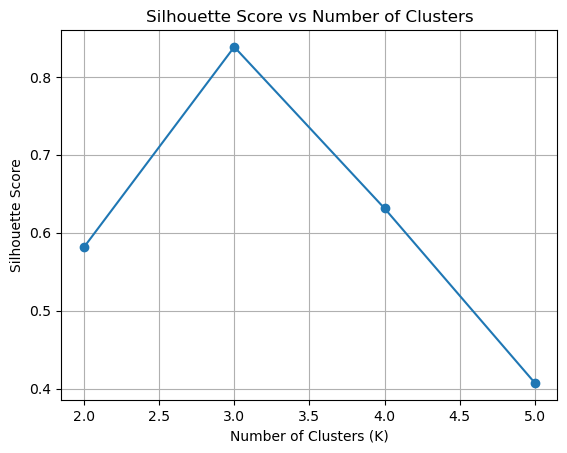

Best K based on silhouette score: 3


In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Part (a): Implement K-Means from 2-5 k-values and interpret the best from silhouette scores

silhouette_scores = {} # Store silhouette scores

# Try K from 2 to 5
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=231)
    cluster_labels = kmeans.fit_predict(df_blobs.drop(columns=['True_Label']))  # Drop true labels

    # Compute silhouette score
    score = silhouette_score(df_blobs.drop(columns=['True_Label']), cluster_labels)
    silhouette_scores[k] = score

    print(f"K = {k}, Silhouette Score = {score:.4f}")

# Plot silhouette scores
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.grid(True)
plt.show()

best_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"Best K based on silhouette score: {best_k}")

C:\Users\numbe\anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


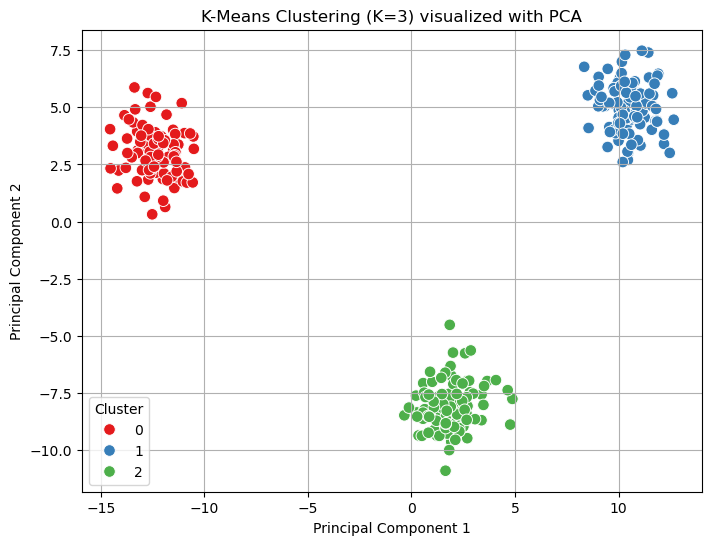

In [8]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Part (b): Visualise the clusters with PCA at 2 principal components

# Run KMeans with the best number of clusters
kmeans = KMeans(n_clusters=best_k, random_state=231)
cluster_labels = kmeans.fit_predict(df_blobs.drop(columns=['True_Label']))

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_blobs.drop(columns=['True_Label']))

# Create a DataFrame for plotting
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels

# Plot the PCA-reduced data with cluster labels
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=70)
plt.title(f"K-Means Clustering (K={best_k}) visualized with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

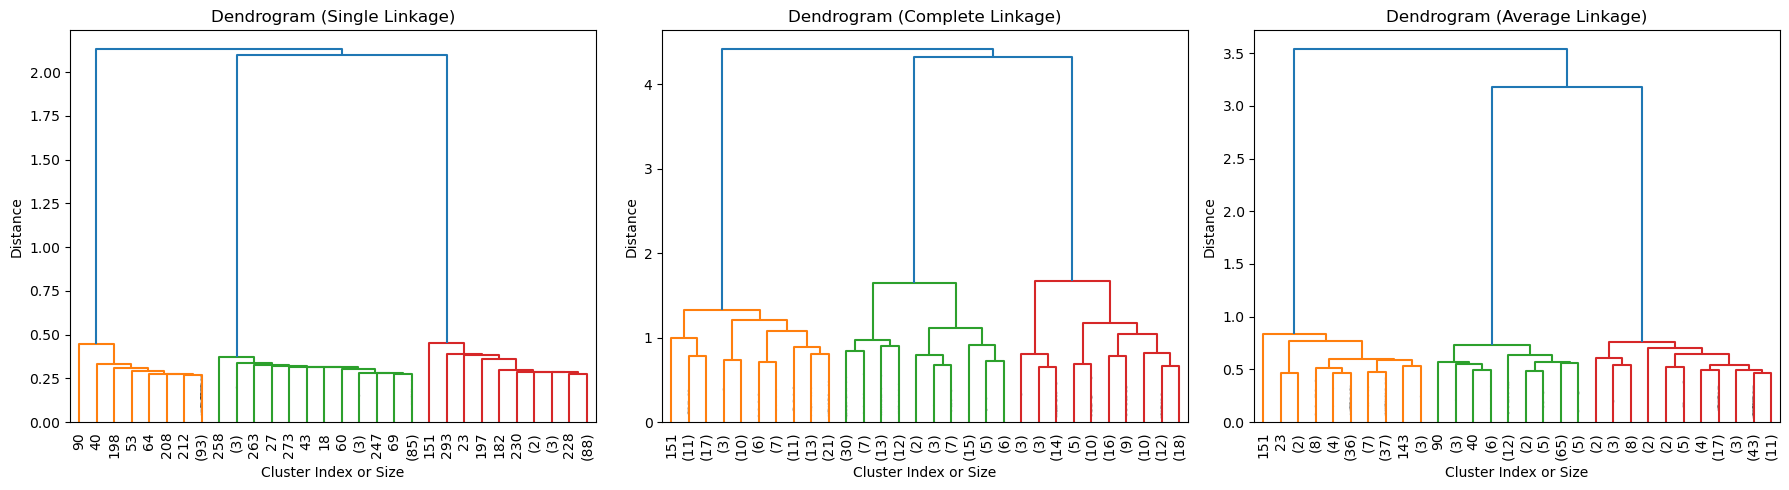

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Part (c) Generate dendrograms to the same dataaset with Agglomerative clustering

# Standardize the data 
X_scaled = StandardScaler().fit_transform(df_blobs.drop(columns=['True_Label']))

# Linkage methods to compare
linkage_methods = ['single', 'complete', 'average']

# Generate dendrograms
plt.figure(figsize=(18, 5))
for i, method in enumerate(linkage_methods):
     # 1. Perform clustering using AgglomerativeClustering
    model = AgglomerativeClustering(n_clusters=3, linkage=method)
    labels = model.fit_predict(X_scaled)
    
    # 2. Compute the linkage matrix using the same method for dendrogram
    Z = linkage(X_scaled, method=method)

    # 3. Plot dendrogram
    plt.subplot(1, 3, i + 1)
    dendrogram(Z,truncate_mode='lastp',  p=30, leaf_rotation=90., leaf_font_size=10. ,show_contracted=True)
    plt.title(f"Dendrogram ({method.capitalize()} Linkage)")
    plt.xlabel("Cluster Index or Size")
    plt.ylabel("Distance")

plt.tight_layout()
plt.show()